# Relations between features

An important step of the data analysis is to understand the existing relations between a dataset features. From this relations, we can eventually identify redundant characteristics, which afford us working with a smaller dataset characteristics selected in order to preserve the most important part of the existing information at our dataset. 

The main types of relations between features that we investigate in our data are: covariance, correlation, causality and conditionality.


## Covariance and correlation

The Covariance is a statistical concept that evaluates the behavior of one characteristic in relation to another. Basically, there are three types of correlation:

* **Positive**: represents a direct proportionality between the features. That is, the growth of a feature implies the growth of the other feature value.
* **Negative**: represents an inverse proportionality between the features. That is, the growth of a feature implies the fall of the other feature value.
* **Null**: represents a abscence of relation between the features. That is, changes in one feature do not make a standard pattern change in the other feature.

In general, the covariance measure is used to analyze the correlation between one or more features pairs. So, while the covariance inform us if exists a relation between the features, the correlation quantifies this relation. We can analyze the correlation between the data using graphics and analytics resources.

### Between a features pair

We can graphically analyze the correlation between a features pair through a **scatter plot**. If we want to do an analytical analysis, it can be used differents **correlations metrics**.

#### Scatter plot

At this type of graphic, the data are showed as points in a Cartesiane plan, where each axis represents a feature that is wanted to compare. The correlation between the features are evaluated in function of the shown pattern. To show a real example, we will use the estimated data of the Brazil height and weight medians given by the IBGE, splitted by age groups. 


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [0]:
weight_height = pd.read_csv("https://raw.githubusercontent.com/leobezerra/pandas-zero/master/datasets/ibge-peso-altura-brasil.csv", sep=";", decimal=",")
weight_height.head()

,Idade,Altura,Peso
0,Menos de 1 ano,67.0,8.1
1,1 ano,81.5,11.5
2,2 anos,92.0,13.9
3,3 anos,98.9,16.0
4,4 anos,106.2,18.0


> Obs.: From this portuguese csv database, we have columns `"Idade"`, `"Altura"` and `"Peso"` that are `"Age"`, `"Height"` (in centimeters) and `"Weight"` (in kilograms), respectively.

When a feature pair shows a **positive** covariance, we can observe a tendency 
with a positive slope. This is the expected pattern for the relation between the features "Height" and "Weight", which we can verify with the `regplot` method from `seaborn` library: 

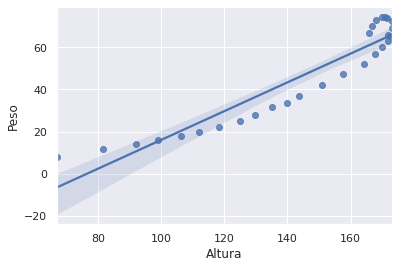

In [0]:
sns.regplot(x="Altura", y="Peso", data=weight_height)
plt.show()

Notice that the graphic above seems to present a mix of two patterns. At the region where the weight (on the y axis) is smaller than 65kg, there is a positive covariance between the analyzed features (line trend with positive inclination): 

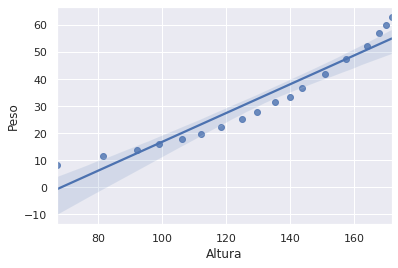

In [0]:
weight_upto_65 = weight_height.query("Peso < 65") #Selecting only the weights up to 65 kg.
sns.regplot(x="Altura", y="Peso", data=weight_upto_65) #Plotting
plt.show()

Already for the area where the height is higher than 65 kg, there is no pattern showed, which is characterized as a **null covariance** (parallel trend line to one of the axes): 

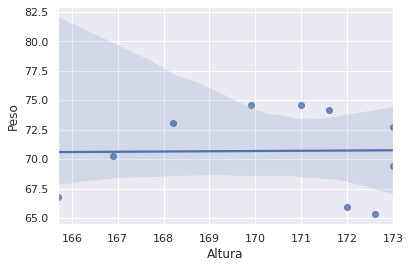

In [0]:
weight_greater_than_65 = weight_height.query("Peso > 65") #Selecting only the weights greater than 65 kg.
sns.regplot(x="Altura", y="Peso", data=weight_greater_than_65) #Plotting
plt.show()

This result makes sense when we realize that, in general, weight medians until 65kg represents childs and teenagers in scholar age, where there is a strong relation between height and weight gain:

In [0]:
weight_upto_65["Idade"].unique() #Selecting all the ages where the weight is up to 65 kg.

array(['Menos de 1 ano', '1 ano', '2 anos', '3 anos', '4 anos', '5 anos',
       '6 anos', '7 anos', '8 anos', '9 anos', '10 anos', '11 anos',
       '12 anos', '13 anos', '14 anos', '15 anos', '16 anos', '17 anos'],
      dtype=object)

We can see above that there are only data for young people up to 17 years old. Already for weight medians higher than 65kg, we are talking about teenagers in a universitary age, adults and old aged, which there is not a direct relation between height and weight:

In [0]:
weight_greater_than_65["Idade"].unique() #Selecting ages which the weight is greater than 65 kg.

array(['18 anos', '19 anos', '20 a 24 anos', '25 a 29 anos',
       '30 a 34 anos', '35 a 44 anos', '45 a 54 anos', '55 a 64 anos',
       '65 a 74 anos', '75 anos ou mais'], dtype=object)

To finish, when a features pair presents **negative** covariance, we see a tendency with negative inclination. We can create a new feature where we calculate 100 kg minus the weights that we already have on database. Let's call this new one `"Complement for 100 kg"`:

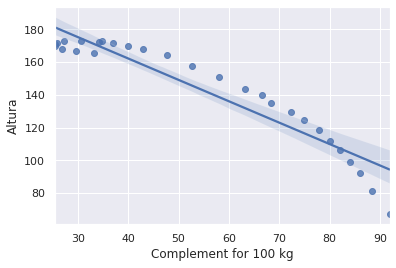

In [0]:
weight_height["Complement for 100 kg"] = 100 - weight_height["Peso"]
sns.regplot(x="Complement for 100 kg", y="Altura", data=weight_height)
plt.show()

Note that the creation of this new feature did not affect the existing of the both pattern observed for each original feature.

#### Metrics of correlation

The most commom metrics of correlation are **Pearson** and **Spearman** , which evaluate the points adherence to the observed tendency. For Pearson correlation, we use a trend line like a tendency, as in the graphics generated with `regplot`. The evaluated data hereafter presents a good adherenche to the trend line, whats is captured by Pearson correlation like a value next to 1:

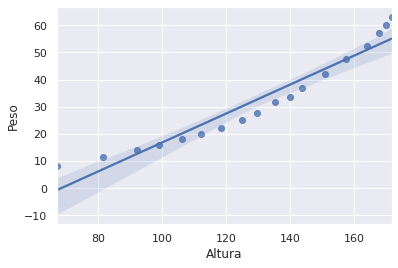

In [0]:
sns.regplot(x=weight_upto_65["Altura"], y=weight_upto_65["Peso"])
plt.show()

In [0]:
weight_upto_65[["Altura","Peso"]].corr()

,Altura,Peso
Altura,1.000000,0.965415
Peso,0.965415,1.000000


For the case of negative correlation , we have that a strong correlation is evaluate like values next to -1: 

In [0]:
weight_upto_65["Complement for 100 kg"] = 100 - weight_upto_65["Peso"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


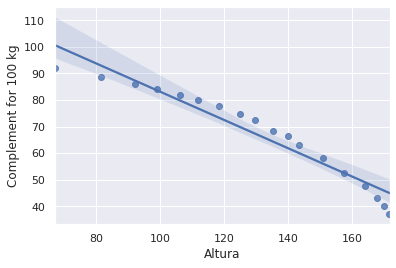

In [0]:
sns.regplot(x=weight_upto_65["Altura"], y=weight_upto_65["Complement for 100 kg"])
plt.show()

In [0]:
weight_upto_65[["Altura","Complement for 100 kg"]].corr()

,Altura,Complement for 100 kg
Altura,1.000000,-0.965415
Complement for 100 kg,-0.965415,1.000000


Lastly, a weak correlation will be evaluate with values next to 0:

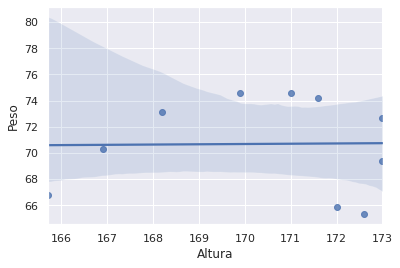

In [0]:
sns.regplot(x=weight_greater_than_65["Altura"], y=weight_greater_than_65["Peso"])
plt.show()

In [0]:
weight_greater_than_65[["Altura","Peso"]].corr()

,Altura,Peso
Altura,1.000000,0.014937
Peso,0.014937,1.000000


It is important to note that Pearson's correlation measures only the data adherence in the trend, not being affected by the slop of the trend line( unless it indicates the positive or negative correlation ). We will see that case generating a characteristic for the body mass index: 

In [0]:
weight_height["IMC"] = weight_height["Peso"] / (weight_height["Altura"] * weight_height["Altura"])

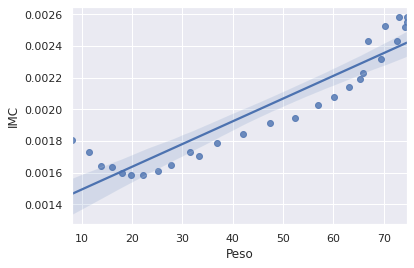

In [0]:
sns.regplot(x="Peso", y="IMC", data=weight_height)
plt.show()

In [0]:
weight_height[["Peso","IMC"]].cov()

,Peso,IMC
Peso,544.363228,7.812458e-03
IMC,0.007812,1.300185e-07


In [0]:
weight_height[["Peso","IMC"]].corr()

,Peso,IMC
Peso,1.000000,0.928626
IMC,0.928626,1.000000


Notice that despite low covariance, the data above represents a high correlation. This example reflects well the difference between covariance and correlation, since covariance is concentraded on slop of the trend line, while the correlation is concentraded on adherence of the data to that line. For measured the adherence of the data, the Pearson's correlation is described with linear. 

On the other hand, the Spearman's correlation allow assessing the datas adherence to the trend lines or not. In the example below, we see which non-linear trend measures( parameter `order=2` in the module `regplot`) have a greater data adherence, which is reflected by Spearman's:

In [0]:
weight_greater_than_65[["Altura","Peso"]].corr(method="spearman")

,Altura,Peso
Altura,1.000000,-0.219512
Peso,-0.219512,1.000000


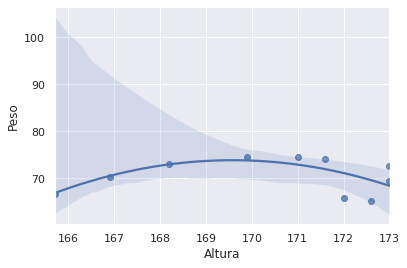

In [0]:
sns.regplot(x=weight_greater_than_65["Altura"], y=weight_greater_than_65["Peso"], order=2)
plt.show()

### Between multiples features pairs

When working with multiples pairs of features , first we analytically calculate the correlation between each pair and then we use graphic visualization. As seen above, the method `corr` presents in `DataFrame` objects allows the calculation between all existing pairs in a dataframe:

In [0]:
weight_height.corr()

,Altura,Peso,Complement for 100 kg,IMC
Altura,1.000000,0.945137,-0.945137,0.760730
Peso,0.945137,1.000000,-1.000000,0.928626
Complement for 100 kg,-0.945137,-1.000000,1.000000,-0.928626
IMC,0.760730,0.928626,-0.928626,1.000000


To improve the the data visualization, we can generate a **heat map** from the correlation matrix. In this type of graph, colors play a fundamental role on the data understanding. Normally, colder colors (close to white) represent positive correlations, while warmer colors (close to black) indicates negative correlations:

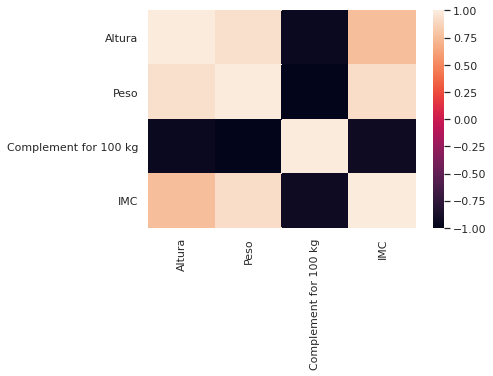

In [0]:
sns.heatmap(weight_height.corr())
plt.show()

From this plot we can note that **Peso (weight)** and **IMC (BMI)**, and also **Peso (weight)** and **Altura (height)** are the two most correlated pairs, because it's the two more "white colors".

We can customize the `heatmap` method in different ways, swapping for example the side legend for values inside each cell of the map for a better visualization:

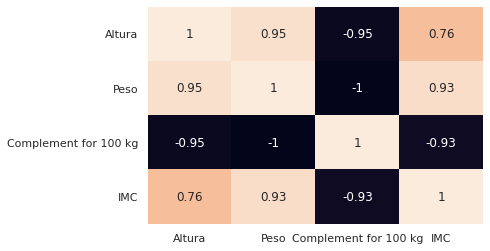

In [0]:
sns.heatmap(weight_height.corr(), annot=True, cbar=False)
plt.show()

With this graph we can confirm what was said above, the biggest correlations are 0.95 and 0.93.

## Causality and conditionality

It is important to note that a high correlation between two characteristics **does not in any way imply** that one characteristic is caused by the other. In fact, it is quite difficult to investigate causality just from analyzing a pair of characteristics.

> This site shows strong correlations between characteristics, but which possibly do not have causality between themselves https://www.tylervigen.com/spurious-correlations

A particular situation is the case of conditional characteristics. In this case, the available dataset only presents data for a certain characteristic when the data for another characteristic satisfies a certain condition. 

We will analyze this situation in a Kaggle home prices dataset.
To download it, first follow [step 1 of this tutorial](https://medium.com/@yvettewu.dw/tutorial-kaggle-api-google-colaboratory-1a054a382de0), which teaches you how to download Kaggle access credentials (`kaggle.json`). Once you have downloaded your credentials, use the menu on the side to upload the file to Colab, and run the three cells below:

In [0]:
!mkdir /root/.kaggle
!cp /content/kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [0]:
!kaggle datasets download -d prevek18/ames-housing-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [0]:
ames_housing = pd.read_csv("ames-housing-dataset.zip")
ames_housing.head()

FileNotFoundError: ignored

> If any of the cells above do not work, contact the maintainers of pandas-zero ;)

This dataset contains the description of several properties, presenting 82 characteristics about each property. However, when a data set has a high number of characteristics, it is common for some of these characteristics to be additional information in relation to another characteristic.

In the case of this dataset, we will filter only the characteristics related to the term `"Garage"`:

In [0]:
ames_garage = ames_housing.filter(like="Garage")
ames_garage.head()

Note that the first feature defines the type of garage. This characteristic has the following values:

In [0]:
ames_garage["Garage Type"].value_counts(dropna=False)

One of the possible values for this characteristic is the lack of this data (`NaN`, which we identified by passing the` dropna = False` argument to the `value_counts` method). When this data is missing, the other characteristics no longer make sense:

In [0]:
ames_garage[ames_garage["Garage Type"].isna()]

The way we proceed in this type of situation depends on the context. In this case, as we have nominal characteristics depending on this characteristic and a low number of cases where the original characteristic is absent, the best alternative is to remove these observations:

In [0]:
ames_housing = ames_housing[~ames_housing["Garage Type"].isna()]
ames_housing["Garage Type"].value_counts(dropna=False)

## A simple example of selecting features

The main advantage of analysing the relation between features present in your dataset is the possibility of selecting a subset of features that can represents the major part of information contained in the original set. To understand how much is necessary, let's take as an example the houses dataset above. We start with a heat map, to try to evaluate if we have redundant features:

In [0]:
sns.heatmap(ames_housing.corr())
plt.show()

Note that is very difficult to discuss something in relation to such a large map. A useful tool in this type of situation is the `clustermap` method of the `seaborn` library, which groups the patterns observed in the map above. 

In [0]:
sns.clustermap(ames_housing.corr())
plt.show()

> Note that the visualization above includes a dendrogram, which you can search for if you want to better understand the concept of **cluster analysis**.

Now the visualization is much more interpretable that our first try, but it is still possible to improve it a little more. Using the `clustermap` method parameters we will increase the graph size so the names of all the features fit in the legend (`figsize=(20,20)`) and change the color legend for the annotation of values (`annot=True, fmt='.1g', cbar_pos=None`):

In [0]:
sns.clustermap(ames_housing.corr(), figsize=(20,20), annot=True, fmt='.1g', cbar_pos=None)
plt.show()

For our analysis, we see that there are two big groups of features. The first group practically correlates with any characteristic of the dataset. In turn, the second group correlates strongly with the characteristics of the second group itself.

The way we can proceed from this informations depends on our goal. If our goal is to predict the values of feature `"SalePrice"` from the other features, we can firstly investigate the features most correlated to it. In this case, we have `"Overall Qual"` and `"Gr Liv Area"`, that are respectively, the property quality and it's living area.

In [0]:
sns.regplot(x="Overall Qual", y="SalePrice", data=ames_housing)
plt.show()

In [0]:
sns.regplot(x="Gr Liv Area", y="SalePrice", data=ames_housing)
plt.show()

In its turn, these two characteristics have a strong correlation with each other:

In [0]:
sns.regplot(x="Overall Qual", y="Gr Liv Area", data=ames_housing)
plt.show()

Therefore, if we wanted to work with only a reduced set of features, it would be possible to choose only one of the two to keep in our data set.

> In data analysis practice, there are robust ** feature selection ** methods that you can also search for. In addition to correlation, they can be based on one-variable and multi-varieble statistical and machine learning models 😉